# explore_met_csv_data

## Purpose:
Initial exploration of the met station data saved in [data_gov_sg_met_v1/](https://github.com/grandey/access-data-gov-sg/tree/master/data_gov_sg_met_v1).

## History:
- 2017-06 - Benjamin S. Grandey

In [1]:
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

## Read data for single variable and month

In [2]:
df = pd.read_csv('data_gov_sg_met_v1/wind-direction_2016_12_c20170530.csv.gz')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803989 entries, 0 to 803988
Data columns (total 3 columns):
station_id       803989 non-null object
value            803989 non-null int64
timestamp_sgt    803989 non-null object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [3]:
df['timestamp_sgt'] = df['timestamp_sgt'].astype('datetime64[ns]')  # convert to datetime64 type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803989 entries, 0 to 803988
Data columns (total 3 columns):
station_id       803989 non-null object
value            803989 non-null int64
timestamp_sgt    803989 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 18.4+ MB


In [4]:
df.head()

,station_id,value,timestamp_sgt
0,S109,275,2016-12-01 23:43:59
1,S117,331,2016-12-01 23:43:59
2,S50,325,2016-12-01 23:43:59
3,S107,315,2016-12-01 23:43:59
4,S43,315,2016-12-01 23:43:59


In [5]:
df.tail()

,station_id,value,timestamp_sgt
803984,S24B,338,2016-12-31 23:59:59
803985,S24,346,2016-12-31 23:59:59
803986,S116,44,2016-12-31 23:59:59
803987,S104,8,2016-12-31 23:59:59
803988,S100,55,2016-12-31 23:59:59


## Read data across multiple variables and months

In [6]:
# Read data for each variable and store in dictionary
df_dict = {}  # dictionary in which to store DataFrames
for variable in ['rainfall', 'wind-speed', 'wind-direction']:
    df = pd.DataFrame()  # initialise df as an empty DataFrame
    filenames = glob('data_gov_sg_met_v1/{}_*.csv.gz'.format(variable))
    for filename in filenames:
        temp_df = pd.read_csv(filename)  # read data from file
        temp_df = temp_df.rename(columns={'value': variable})  # rename 'value' column
        temp_df['timestamp_sgt'] = temp_df['timestamp_sgt'].astype('datetime64[ns]')  # convert to datetime64
        df = df.append(temp_df, ignore_index=True)  # append to df
        print('Read {}'.format(filename))
    df_dict[variable] = df  # store df in dictionary

Read data_gov_sg_met_v1/rainfall_2016_12_c20170529.csv.gz
Read data_gov_sg_met_v1/rainfall_2017_01_c20170529.csv.gz
Read data_gov_sg_met_v1/rainfall_2017_02_c20170529.csv.gz
Read data_gov_sg_met_v1/rainfall_2017_03_c20170529.csv.gz
Read data_gov_sg_met_v1/rainfall_2017_04_c20170529.csv.gz
Read data_gov_sg_met_v1/wind-speed_2016_12_c20170530.csv.gz
Read data_gov_sg_met_v1/wind-speed_2017_01_c20170530.csv.gz
Read data_gov_sg_met_v1/wind-speed_2017_02_c20170530.csv.gz
Read data_gov_sg_met_v1/wind-speed_2017_03_c20170530.csv.gz
Read data_gov_sg_met_v1/wind-speed_2017_04_c20170530.csv.gz
Read data_gov_sg_met_v1/wind-direction_2016_12_c20170530.csv.gz
Read data_gov_sg_met_v1/wind-direction_2017_01_c20170530.csv.gz
Read data_gov_sg_met_v1/wind-direction_2017_02_c20170531.csv.gz
Read data_gov_sg_met_v1/wind-direction_2017_03_c20170531.csv.gz
Read data_gov_sg_met_v1/wind-direction_2017_04_c20170531.csv.gz


In [7]:
# Union across the different variables
outer_df = df_dict['rainfall']  # initialise with rainfall data
for variable in ['wind-speed', 'wind-direction']:
    outer_df = outer_df.merge(df_dict[variable], how='outer', on=['station_id', 'timestamp_sgt'])
outer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5449603 entries, 0 to 5449602
Data columns (total 5 columns):
station_id        object
rainfall          float64
timestamp_sgt     datetime64[ns]
wind-speed        float64
wind-direction    float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 249.5+ MB


In [8]:
outer_df.head()

,station_id,rainfall,timestamp_sgt,wind-speed,wind-direction
0,S77,0.0,2016-12-02 21:49:59,NaN,NaN
1,S109,0.0,2016-12-02 21:49:59,NaN,236.0
2,S117,0.0,2016-12-02 21:49:59,NaN,245.0
3,S55,0.0,2016-12-02 21:49:59,NaN,NaN
4,S64,0.0,2016-12-02 21:49:59,NaN,NaN


In [9]:
outer_df.tail()

,station_id,rainfall,timestamp_sgt,wind-speed,wind-direction
5449598,S24B,NaN,2017-01-06 03:56:59,NaN,24.0
5449599,S24,NaN,2017-01-06 03:56:59,NaN,34.0
5449600,S116,NaN,2017-01-06 03:56:59,NaN,32.0
5449601,S104,NaN,2017-01-06 03:56:59,NaN,28.0
5449602,S100,NaN,2017-01-06 03:56:59,NaN,44.0


In [10]:
# Intersection across the different variables
inner_df = df_dict['rainfall']  # initialise with rainfall data
for variable in ['wind-speed', 'wind-direction']:
    inner_df = inner_df.merge(df_dict[variable], how='inner', on=['station_id', 'timestamp_sgt'])
inner_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740034 entries, 0 to 740033
Data columns (total 5 columns):
station_id        740034 non-null object
rainfall          740034 non-null float64
timestamp_sgt     740034 non-null datetime64[ns]
wind-speed        740034 non-null float64
wind-direction    740033 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 33.9+ MB


In [11]:
inner_df.head()

,station_id,rainfall,timestamp_sgt,wind-speed,wind-direction
0,S109,0.0,2016-12-08 11:04:59,2.8,327.0
1,S117,0.0,2016-12-08 11:04:59,4.5,327.0
2,S50,0.0,2016-12-08 11:04:59,2.6,330.0
3,S107,0.0,2016-12-08 11:04:59,4.2,343.0
4,S43,0.0,2016-12-08 11:04:59,3.3,26.0


In [12]:
inner_df.tail()

,station_id,rainfall,timestamp_sgt,wind-speed,wind-direction
740029,S115,0.0,2017-04-30 23:55:00,1.7,198.0
740030,S24,0.0,2017-04-30 23:55:00,7.8,150.0
740031,S116,0.0,2017-04-30 23:55:00,6.0,113.0
740032,S104,0.0,2017-04-30 23:55:00,3.9,191.0
740033,S100,0.0,2017-04-30 23:55:00,1.4,97.0


## Summary statistics by station

In [13]:
outer_df.groupby('station_id').describe(percentiles=[0.5,])

rainfall                                     wind-direction  \
              count      mean       std  min  50%   max          count   
station_id                                                               
S06         32967.0  0.026608  0.269262  0.0  0.0  10.0       164822.0   
S07         41707.0  0.028609  0.302601  0.0  0.0  13.0            0.0   
S08         38529.0  0.024999  0.284256  0.0  0.0  13.8            0.0   
S100        42423.0  0.021667  0.230649  0.0  0.0   8.4       214719.0   
S101        42374.0  0.023118  0.250110  0.0  0.0   9.8            0.0   
S102        37335.0  0.014908  0.184883  0.0  0.0   9.4       185231.0   
S103          488.0  0.000000  0.000000  0.0  0.0   0.0            0.0   
S104        42269.0  0.025584  0.256984  0.0  0.0   8.6       211798.0   
S106        38485.0  0.022648  0.238557  0.0  0.0  12.0       192404.0   
S107        42332.0  0.023372  0.241014  0.0  0.0   8.4       212051.0   
S108        40937.0  0.022532  0.244606  0.0  0.0  10.0       200936.0   
S109        42444.0  0.027622  0.289480  0.0  0.0  11.4       214820.0   
S11         42569.0  0.025761  0.283332  0.0  0.0  10.6            0.0   
S110        36037.0  0.023570  0.256825  0.0  0.0  11.0            0.0   
S112        41270.0  0.019772  0.246875  0.0  0.0  13.8            0.0   
S113        41946.0  0.024646  0.260807  0.0  0.0  11.0            0.0   
S114        41538.0  0.026660  0.280849  0.0  0.0   9.8            0.0   
S115        41858.0  0.019819  0.245139  0.0  0.0  11.6       210794.0   
S116        42542.0  0.017898  0.193324  0.0  0.0   6.6       214845.0   
S117        42497.0  0.021757  0.241832  0.0  0.0   9.2       213500.0   
S118        38898.0  0.025919  0.282751  0.0  0.0  10.6            0.0   
S119        42520.0  0.024356  0.264549  0.0  0.0   9.4            0.0   
S120        41641.0  0.022728  0.251433  0.0  0.0   9.8            0.0   
S121        37561.0  0.026149  0.270661  0.0  0.0   9.0       187242.0   
S122        42495.0  0.020595  0.231239  0.0  0.0  10.8       214238.0   
S123        42592.0  0.027188  0.288199  0.0  0.0  11.6            0.0   
S24         42068.0  0.023162  0.249425  0.0  0.0  11.2       211594.0   
S24B        41114.0  0.000000  0.000000  0.0  0.0   0.0       204101.0   
S29         41922.0  0.024703  0.257607  0.0  0.0   9.4            0.0   
S33         42436.0  0.022509  0.283383  0.0  0.0  14.2            0.0   
S35         42564.0  0.023203  0.249482  0.0  0.0  10.4            0.0   
S36         35953.0  0.029244  0.296501  0.0  0.0  10.4            0.0   
S40         42445.0  0.026062  0.287522  0.0  0.0  13.8            0.0   
S43         42484.0  0.030670  0.313657  0.0  0.0  12.4       215040.0   
S44         41331.0  0.021161  0.231964  0.0  0.0  12.4       206788.0   
S46         42609.0  0.024938  0.260366  0.0  0.0  11.2            0.0   
S50         42257.0  0.025974  0.269884  0.0  0.0  10.6       212597.0   
S55         42568.0  0.024704  0.258740  0.0  0.0  13.4            0.0   
S60         13618.0  0.017389  0.229889  0.0  0.0   7.6        20866.0   
S61         42591.0  0.028344  0.289499  0.0  0.0  12.0            0.0   
S63         40005.0  0.018478  0.221918  0.0  0.0   9.4            0.0   
S64         42604.0  0.025716  0.278298  0.0  0.0  12.2            0.0   
S66         42515.0  0.024086  0.279983  0.0  0.0  13.0            0.0   
S69         35718.0  0.024145  0.281058  0.0  0.0  11.0            0.0   
S71         40091.0  0.021097  0.251096  0.0  0.0  10.2            0.0   
S72            33.0  0.000000  0.000000  0.0  0.0   0.0            0.0   
S77         42603.0  0.021665  0.236326  0.0  0.0  11.6            0.0   
S78         41991.0  0.024786  0.259600  0.0  0.0   9.8            0.0   
S79         42409.0  0.023891  0.270977  0.0  0.0  10.4            0.0   
S81         41890.0  0.027262  0.300110  0.0  0.0  12.6            0.0   
S84         41689.0  0.022049  0.246295  0.0  0.0  14.0            0.0   
S88         407

## Plot timeseries for a specific station

In [14]:
# Select data for dataion S06
s06_df = outer_df[outer_df['station_id'] == 'S06']

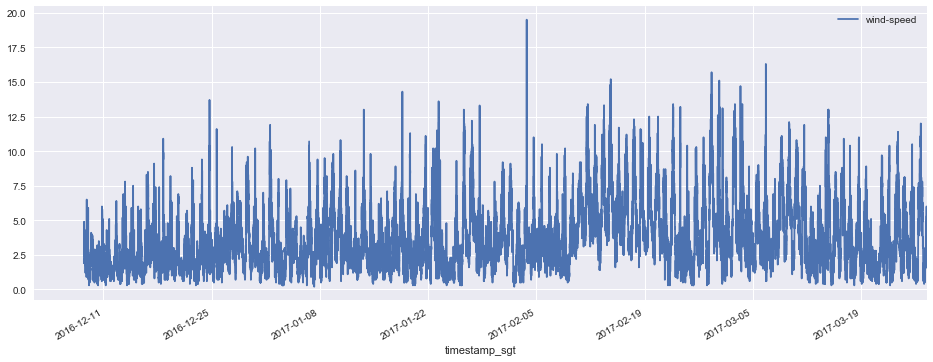

In [15]:
# Wind-speed timeseries
fig, ax = plt.subplots(figsize=(16, 6))
s06_df.set_index('timestamp_sgt').plot(y='wind-speed', ax=ax)

## Wind-speed vs rainfall for a specific station

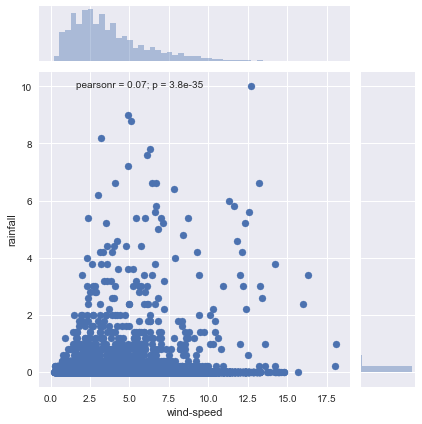

In [16]:
# Quick look at relationship between wind-speed and rainfall for one station
sns.jointplot(s06_df['wind-speed'], s06_df['rainfall'], kind='scatter', dropna=True)

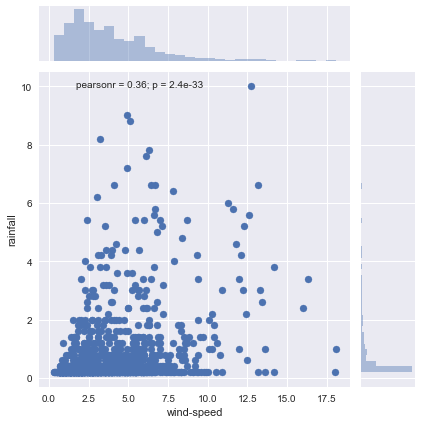

In [17]:
# What happens if times with zero rain are excluded?
s06_has_rainfall = s06_df[s06_df['rainfall'] > 0]
sns.jointplot(s06_has_rainfall['wind-speed'], s06_has_rainfall['rainfall'], kind='scatter', dropna=True)